In [1]:
import parse_data.prepare_data as prepare_data
import data_extraction.get_indices as get_indices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import globals

In [2]:
# paths
# data_folder = '/home/tom/Documents/SWC/data' # desktop Duan Lab
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-53-34_YansuSecondSolo.json' 
# json_filename = '240913_Yansu_Jerry/2024-09-13_11-31-00_YansuJerrySocial.json'
data_folder = r'D:\Users\Tom\OneDrive\PhD\SWC\data' # desktop home
json_filenames = [r'first_experiments_2409\240913\2024-09-13_11-23-37_YansuFirstSolo.json',
                  r'first_experiments_2409\240913\2024-09-13_11-23-50_JerryFirstSolo.json',
                  r'first_experiments_2409\240913\2024-09-13_11-53-34_YansuSecondSolo.json',
                  r'first_experiments_2409\240913\2024-09-13_11-53-56_JerrySecondSolo.json']
# json_filenames = [r'first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json',
                  # r'second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json',
                  # r'third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json',
                  # r'fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json']


In [3]:
## LOAD DATA ##

In [4]:
df, trials_list = prepare_data.prepare_data(data_folder, json_filenames)

Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
Preprocessing complete.
Preprocessing complete.
Preprocessing complete.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64306 entries, 1435 to 15981
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype          
---  ------                            --------------  -----          
 0   timeLocal                         64306 non-null  datetime64[ns] 
 1   timeApplication                   64306 non-null  timedelta64[ns]
 2   eventDescription                  64306 non-null  object         
 3   data.playerPosition.0.clientId    64171 non-null  float64        
 4   data.playerPosition.0.location.x  64306 non-null  float64        
 5   data.playerPosition.0.location.y  64306 non-null  float64        
 6   data.playerPosition.0.location.z  64306 non-null  float64        
 7   data.playerPosition.0.rotation.x  64306 non-null  float64        
 8   data.playerPosition.0.rotation.y  64306 non-null  float64        
 9   data.playerPosition.0.rotation.z  64306 non-null  float64        
 10  data.trialNum                     64

In [6]:
print(len(trials_list))

135


In [7]:
## TEST WALL NUMBER SELECTIONS ## 

In [8]:
wall1_counts_dict = {}
wall2_counts_dict = {}

for trial in trials_list:
    wall1_vals = trial['data.wall1'].unique()
    # print("wall 1 vals: " + wall1_vals)
    wall2_vals = trial['data.wall2'].unique()
    # print("wall 2 vals: " + wall2_vals)
    
    wall1_val = wall1_vals[~np.isnan(wall1_vals)].item()
    wall2_val = wall2_vals[~np.isnan(wall2_vals)].item()
    
    if wall1_val in wall1_counts_dict.keys():
        wall1_counts_dict[wall1_val] = wall1_counts_dict[wall1_val] + 1
    else:
        wall1_counts_dict[wall1_val] = 1

    if wall2_val in wall2_counts_dict.keys():
        wall2_counts_dict[wall2_val] = wall2_counts_dict[wall2_val] + 1
    else:
        wall2_counts_dict[wall2_val] = 1

<BarContainer object of 8 artists>

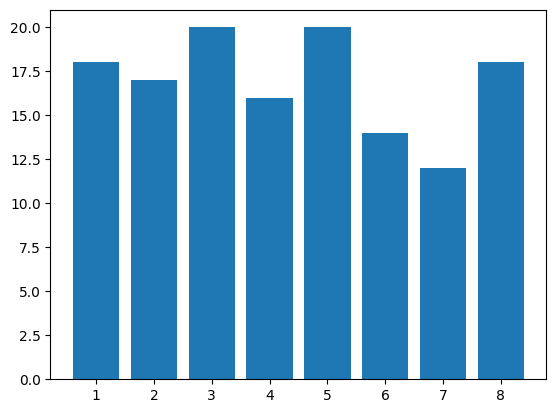

In [9]:
wall_nums = np.arange(1,9)
wall1_counts = np.asarray([wall1_counts_dict[i] for i in wall_nums])
wall2_counts = np.asarray([wall2_counts_dict[i] for i in wall_nums])

plt.bar(wall_nums, wall1_counts)

In [10]:
np.sum(wall1_counts + wall2_counts)

np.int64(270)

<BarContainer object of 8 artists>

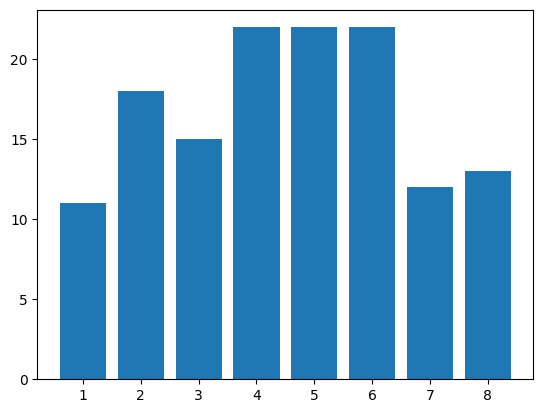

In [11]:
plt.bar(wall_nums, wall2_counts)

<BarContainer object of 8 artists>

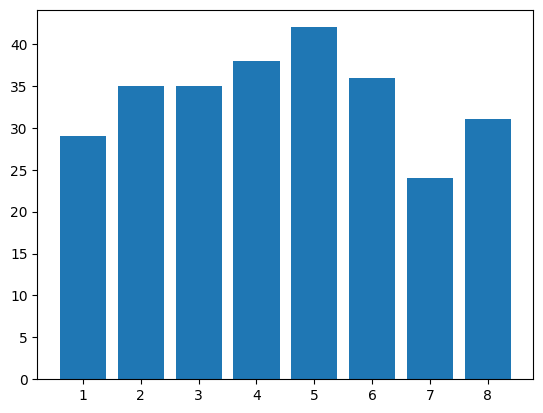

In [12]:
plt.bar(wall_nums, wall1_counts + wall2_counts)

In [13]:
test1 = scipy.stats.chisquare(wall1_counts + wall2_counts)
test2 = scipy.stats.chisquare(wall1_counts)
test3 = scipy.stats.chisquare(wall2_counts)


In [14]:
print(test1.pvalue, test2.pvalue, test3.pvalue)

0.48231186518208413 0.8607677350391032 0.23207738834721095


In [15]:
len(trials_list)

135

In [16]:
## TEST TRIAL TYPE SELECTION ##

In [17]:
df[globals.TRIAL_TYPE].unique()

array(['HighLow', 'ForcedHigh', 'ForcedLow', 'post-trials'], dtype=object)

In [18]:
trial_type_counts_dict = {}

for trial in trials_list:
    trial_type = trial[globals.TRIAL_TYPE].unique()[0]
        
    if trial_type in trial_type_counts_dict.keys():
        trial_type_counts_dict[trial_type] = trial_type_counts_dict[trial_type] + 1
    else:
        trial_type_counts_dict[trial_type] = 1

trial_type_counts_list = [trial_type_counts_dict[key] for key in  trial_type_counts_dict.keys()]
trial_type_labels_list = trial_type_counts_dict.keys()



[Text(0, 0, '113'), Text(0, 0, '14'), Text(0, 0, '8')]

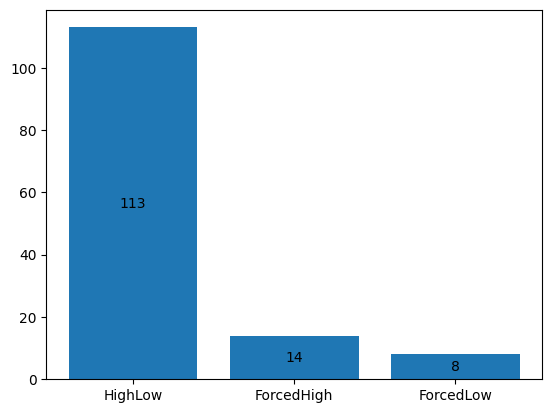

In [19]:
bar = plt.bar([1,2,3], trial_type_counts_list, label=trial_type_labels_list)
plt.xticks([1, 2, 3], trial_type_labels_list)
plt.gca().bar_label(bar, label_type='center')

In [20]:
## TEST WALL SEPARATION VALUES ## 

In [21]:
wall_differences = []
for trial in trials_list:
    wall_difference = get_indices.get_wall_difference(trial)
    if trial[globals.TRIAL_TYPE].unique()[0] == 'HighLow':
        wall_differences.append(wall_difference)

wall_differences = np.asarray(wall_differences)

In [22]:
unique, counts = np.unique(wall_differences, return_counts=True)

In [23]:
unique, counts

(array([1., 2., 4.]), array([37, 35, 41]))

[Text(0, 0, '37'), Text(0, 0, '35'), Text(0, 0, '41')]

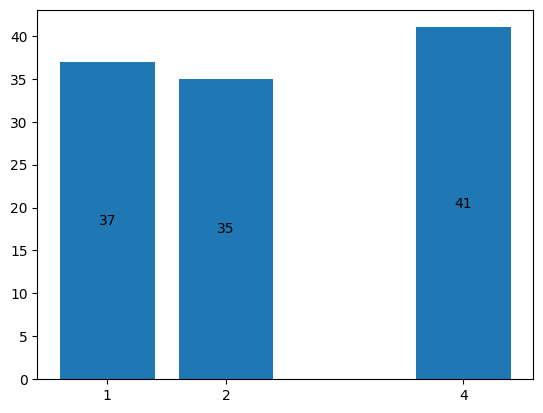

In [24]:
bar = plt.bar(unique, counts, label=unique) 
plt.xticks([1, 2, 4], [1,2,4])
plt.gca().bar_label(bar, label_type='center')

In [25]:
test4 = scipy.stats.chisquare([counts[0], counts[2]])

In [26]:
print(test4.pvalue)

0.6506129639327538


In [39]:
trials_list[0][~np.isnan(trials_list[0]['data.wallTriggered'])]['data.wallTriggered'].item() == trials_list[0]['data.wall1'].unique().item()

True

In [38]:
trials_list[0]['data.wall1'].unique().item()

7.0